In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reading an image using opencv
img = cv2.imread("C:\\Users\\jain1\\Desktop\\adventure.jpg")

In [3]:
height, width = img.shape[:2]

In [4]:
# in opencv image is in BGR format whereas in matplotlib it is in RGB
convt_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

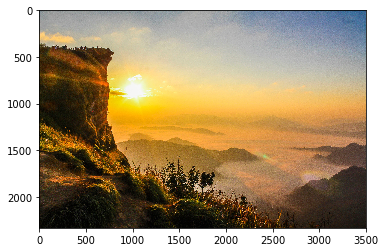

In [5]:
plt.imshow(convt_image)
plt.show()

In [6]:
print(height, width)

2333 3500


In [7]:
#flattem each channelof the image
flatten_image = convt_image.reshape((height*width,3))
print(flatten_image.shape)

(8165500, 3)


In [8]:
flatten_image

array([[148, 145, 154],
       [141, 140, 148],
       [138, 138, 146],
       ...,
       [ 26,  21,  18],
       [ 26,  21,  18],
       [ 26,  21,  18]], dtype=uint8)

In [9]:
from sklearn.cluster import KMeans

In [11]:
dominant_colors = 6
alg = KMeans(n_clusters = dominant_colors)
alg.fit(flatten_image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
centers = alg.cluster_centers_

In [13]:
#converting centers to integer values
centers = np.array(centers, dtype = 'uint8')

In [14]:
print(centers)

[[ 35  26  12]
 [181 129  70]
 [147 156 167]
 [104  66  25]
 [240 178  62]
 [216 202 164]]


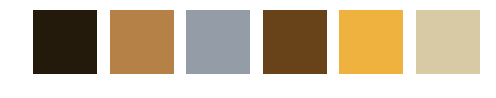

In [15]:
# plot all dominant colors

i = 1
plt.figure(0,figsize = (8,6))

d_colors = []

for each_color in centers:
    plt.subplot(1,6,i)
    plt.axis("off")
    i+=1
    
    d_colors.append(each_color)
    
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_color
    
    plt.imshow(a)
    
plt.show()

In [16]:
predictions = alg.labels_

In [24]:
d_colors

[array([35, 26, 12], dtype=uint8),
 array([181, 129,  70], dtype=uint8),
 array([147, 156, 167], dtype=uint8),
 array([104,  66,  25], dtype=uint8),
 array([240, 178,  62], dtype=uint8),
 array([216, 202, 164], dtype=uint8)]

In [26]:
segmented_image = np.zeros((height*width,3), dtype = 'uint8')
print(segmented_image.shape)

(8165500, 3)


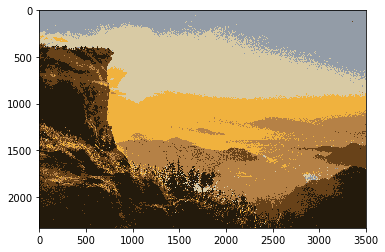

In [27]:
#filling the closest d_colors pixel values for segmented image
for pix in range(segmented_image.shape[0]):
    segmented_image[pix] = d_colors[predictions[pix]]

segmented_image_3D = segmented_image.reshape((height,width,3))
plt.imshow(segmented_image_3D)
plt.show()